In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
n_points = 250       # Number of data points (e.g., charge cycles or days)
initial_capacity = 100 # Initial battery capacity (%)
degradation_rate = 0.05 # Average capacity loss per point
noise_level = 0.3     # Random fluctuations around the trend
random_seed = 42      # For reproducibility

In [3]:
np.random.seed(random_seed)

In [4]:
# Create time steps (representing cycles or days)
time = np.arange(n_points)
time

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [6]:
# Simulate a slightly non-linear degradation trend
trend = initial_capacity - degradation_rate * time - 0.0001 * time**2
trend

array([100.    ,  99.9499,  99.8996,  99.8491,  99.7984,  99.7475,
        99.6964,  99.6451,  99.5936,  99.5419,  99.49  ,  99.4379,
        99.3856,  99.3331,  99.2804,  99.2275,  99.1744,  99.1211,
        99.0676,  99.0139,  98.96  ,  98.9059,  98.8516,  98.7971,
        98.7424,  98.6875,  98.6324,  98.5771,  98.5216,  98.4659,
        98.41  ,  98.3539,  98.2976,  98.2411,  98.1844,  98.1275,
        98.0704,  98.0131,  97.9556,  97.8979,  97.84  ,  97.7819,
        97.7236,  97.6651,  97.6064,  97.5475,  97.4884,  97.4291,
        97.3696,  97.3099,  97.25  ,  97.1899,  97.1296,  97.0691,
        97.0084,  96.9475,  96.8864,  96.8251,  96.7636,  96.7019,
        96.64  ,  96.5779,  96.5156,  96.4531,  96.3904,  96.3275,
        96.2644,  96.2011,  96.1376,  96.0739,  96.01  ,  95.9459,
        95.8816,  95.8171,  95.7524,  95.6875,  95.6224,  95.5571,
        95.4916,  95.4259,  95.36  ,  95.2939,  95.2276,  95.1611,
        95.0944,  95.0275,  94.9604,  94.8931,  94.8256,  94.7

In [8]:
# Add some random noise
noise = np.random.normal(loc=0.0, scale=noise_level, size=n_points)
noise

array([-0.37826519,  0.27535858,  0.63664686,  0.30973958, -0.45581099,
       -0.14527022,  0.38007334, -0.21230084,  0.13314583,  0.23239022,
       -0.27807914, -0.01785761, -0.9723802 , -0.30731629, -0.07577045,
       -0.37433495,  0.48972339, -0.42904241, -0.13201335,  0.03922217,
        0.43238199, -0.43075865,  0.34894913,  0.00306992, -0.2944526 ,
        0.13863104,  0.05971791, -0.18006506,  0.02094063, -0.11559408,
        0.0340552 ,  0.1986392 ,  0.47580504, -0.37134465,  0.63991001,
       -0.58562634, -0.04553553,  0.17649516,  0.08429756, -0.18680986,
       -0.06243668, -0.14790028, -0.17680943,  0.25488063,  0.10710465,
       -0.20787288,  0.26987996,  0.09218986,  0.24385864,  0.18888865,
       -0.2486985 , -0.16805431,  0.22418808,  0.18311108, -0.00627048,
        0.03519821,  0.38329947, -0.17747142,  0.16412921, -0.0606578 ,
       -0.06530436,  0.32963306,  0.2476249 ,  0.24405289,  0.39164364,
        0.00630115,  0.20458589, -0.09308003,  0.09724991, -0.03

In [9]:
# Combine trend and noise
capacity = trend + noise
capacity

array([ 99.62173481, 100.22525858, 100.53624686, 100.15883958,
        99.34258901,  99.60222978, 100.07647334,  99.43279916,
        99.72674583,  99.77429022,  99.21192086,  99.42004239,
        98.4132198 ,  99.02578371,  99.20462955,  98.85316505,
        99.66412339,  98.69205759,  98.93558665,  99.05312217,
        99.39238199,  98.47514135,  99.20054913,  98.80016992,
        98.4479474 ,  98.82613104,  98.69211791,  98.39703494,
        98.54254063,  98.35030592,  98.4440552 ,  98.5525392 ,
        98.77340504,  97.86975535,  98.82431001,  97.54187366,
        98.02486447,  98.18959516,  98.03989756,  97.71109014,
        97.77756332,  97.63399972,  97.54679057,  97.91998063,
        97.71350465,  97.33962712,  97.75827996,  97.52128986,
        97.61345864,  97.49878865,  97.0013015 ,  97.02184569,
        97.35378808,  97.25221108,  97.00212952,  96.98269821,
        97.26969947,  96.64762858,  96.92772921,  96.6412422 ,
        96.57469564,  96.90753306,  96.7632249 ,  96.69

In [11]:
# Ensure capacity doesn't go unrealistically high or below a floor (e.g., 70%)
capacity = np.clip(capacity, 70, initial_capacity + noise_level*2)
capacity

array([ 99.62173481, 100.22525858, 100.53624686, 100.15883958,
        99.34258901,  99.60222978, 100.07647334,  99.43279916,
        99.72674583,  99.77429022,  99.21192086,  99.42004239,
        98.4132198 ,  99.02578371,  99.20462955,  98.85316505,
        99.66412339,  98.69205759,  98.93558665,  99.05312217,
        99.39238199,  98.47514135,  99.20054913,  98.80016992,
        98.4479474 ,  98.82613104,  98.69211791,  98.39703494,
        98.54254063,  98.35030592,  98.4440552 ,  98.5525392 ,
        98.77340504,  97.86975535,  98.82431001,  97.54187366,
        98.02486447,  98.18959516,  98.03989756,  97.71109014,
        97.77756332,  97.63399972,  97.54679057,  97.91998063,
        97.71350465,  97.33962712,  97.75827996,  97.52128986,
        97.61345864,  97.49878865,  97.0013015 ,  97.02184569,
        97.35378808,  97.25221108,  97.00212952,  96.98269821,
        97.26969947,  96.64762858,  96.92772921,  96.6412422 ,
        96.57469564,  96.90753306,  96.7632249 ,  96.69

In [13]:
# Create a Pandas Series with a DatetimeIndex (good practice for time series)
# Let's assume daily measurements starting from 2023-01-01
dates = pd.date_range(start='2023-01-01', periods=n_points, freq='D')
battery_soh = pd.Series(capacity, index=dates, name='Battery_SOH')
battery_soh

2023-01-01     99.621735
2023-01-02    100.225259
2023-01-03    100.536247
2023-01-04    100.158840
2023-01-05     99.342589
                 ...    
2023-09-03     81.909173
2023-09-04     81.337226
2023-09-05     81.491998
2023-09-06     81.186915
2023-09-07     80.935060
Freq: D, Name: Battery_SOH, Length: 250, dtype: float64

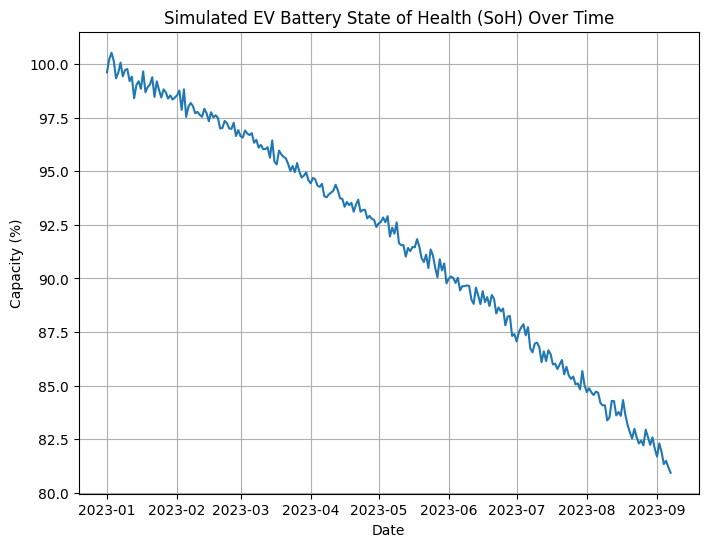

In [17]:
# Visualize the Data
plt.figure(figsize=(8, 6))
plt.plot(battery_soh)
plt.title('Simulated EV Battery State of Health (SoH) Over Time')
plt.xlabel('Date')
plt.ylabel('Capacity (%)')
plt.grid(True)

plt.show()

In [18]:
print(battery_soh.head())

2023-01-01     99.621735
2023-01-02    100.225259
2023-01-03    100.536247
2023-01-04    100.158840
2023-01-05     99.342589
Freq: D, Name: Battery_SOH, dtype: float64


In [19]:
# Save the simulated data to a CSV file
battery_soh.to_csv('/Users/thyag/Desktop/projects/eloctrocute/sample_data/simulated_battery_soh.csv')